In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('housing.csv')
df

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6987,307821.1758,550.00,2.111022,4,892.35,11.89,7.97,28.18,19.23,...,4.76,3.81,6.87,No,White,Yes,1,18,241131.63070,1
6996,6995,421368.8869,1726.12,4.056115,2,943.19,34.06,5.82,90.45,17.60,...,5.31,9.84,10.00,No,White,Yes,1,18,481604.80730,1
6997,6996,473382.5348,1026.36,2.077177,5,149.31,0.10,8.81,31.79,11.59,...,4.98,7.47,2.96,No,Green,No,1,13,380555.49390,1
6998,6998,343397.9756,2218.22,1.000000,4,526.81,11.18,9.20,15.21,3.96,...,4.68,7.66,6.12,No,Blue,Yes,1,10,442610.31710,0


In [3]:
df.head()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

In [5]:
df.describe()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,Floors,Windows,PreviousSalePrice,IsLuxury
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7.000000e+03,7000.00000
mean,3500.500000,3.072820e+05,1048.947459,2.131397,3.008571,511.507029,31.226194,6.942923,46.797046,17.475337,93.711349,1.500437,5.003357,5.934579,5.983860,1.16300,16.248857,2.845094e+05,0.50400
std,2020.870275,1.501734e+05,426.010482,0.952561,1.021940,279.926549,18.025327,1.888148,31.779701,12.024985,4.505359,0.498591,1.970428,2.657930,1.953974,0.37209,8.926479,1.857340e+05,0.50002
min,1.000000,8.500000e+04,550.000000,1.000000,1.000000,0.390000,0.030000,0.220000,0.010000,0.000000,72.050000,0.010000,0.010000,0.000000,0.010000,1.00000,-6.000000,-8.356902e+03,0.00000
25%,1750.750000,1.921075e+05,660.815000,1.290539,2.000000,300.995000,17.390000,5.650000,20.755000,7.827500,90.620000,1.160000,3.660000,4.000000,4.680000,1.00000,11.000000,1.420140e+05,0.00000
50%,3500.500000,2.793230e+05,996.320000,1.997774,3.000000,495.965000,30.385000,7.010000,42.620000,15.625000,94.010000,1.490000,5.020000,6.040000,6.000000,1.00000,15.000000,2.621831e+05,1.00000
75%,5250.250000,3.918781e+05,1342.292500,2.763997,4.000000,704.012500,43.670000,8.360000,67.232500,25.222500,97.410000,1.840000,6.350000,8.050000,7.350000,1.00000,20.000000,3.961212e+05,1.00000
max,7000.000000,1.046676e+06,2874.700000,5.807239,7.000000,1631.360000,99.730000,10.000000,178.680000,65.200000,99.900000,3.360000,10.000000,10.000000,10.000000,3.00000,63.000000,1.296607e+06,1.00000


In [6]:
# 1. Average house price
avg_price = df["Price"].mean()
print("1. Average house price:", avg_price)


1. Average house price: 307281.97215135716


 Calculate average price by bathrooms

3. Avg Price by Bathrooms:
 NumBathrooms
1.000000    222755.161743
1.000604    106751.700700
1.001346    118599.840200
1.002080    208419.375200
1.003707    223063.333500
                ...      
5.741851    677502.420000
5.746048    315702.031100
5.767859    341988.330900
5.772860    429467.294100
5.807239    666173.327000
Name: Price, Length: 5851, dtype: float64


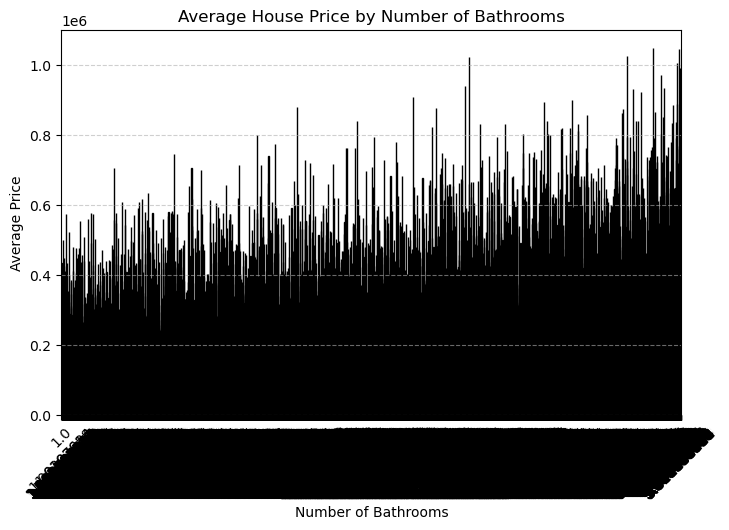

In [7]:
import matplotlib.pyplot as plt

# Calculate average price by bathrooms
avg_price_bathrooms = df.groupby("NumBathrooms")["Price"].mean()
print("3. Avg Price by Bathrooms:\n", avg_price_bathrooms)

# Plot
plt.figure(figsize=(8,5))
avg_price_bathrooms.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average House Price by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [23]:
# 3. Average price by number of bathrooms
avg_price_bathrooms = df.groupby("NumBathrooms")["Price"].mean()
print("3. Avg Price by Bathrooms:\n", avg_price_bathrooms)


3. Avg Price by Bathrooms:
 NumBathrooms
1.000000    222755.161743
1.000604    106751.700700
1.001346    118599.840200
1.002080    208419.375200
1.003707    223063.333500
                ...      
5.741851    677502.420000
5.746048    315702.031100
5.767859    341988.330900
5.772860    429467.294100
5.807239    666173.327000
Name: Price, Length: 5851, dtype: float64


In [9]:
# Calculate average price by bedrooms

4. Avg Price by Bedrooms:
 NumBedrooms
1    201467.748297
2    235540.232870
3    299172.762753
4    376631.641553
5    455607.320735
6    566203.229726
7    582774.318000
Name: Price, dtype: float64


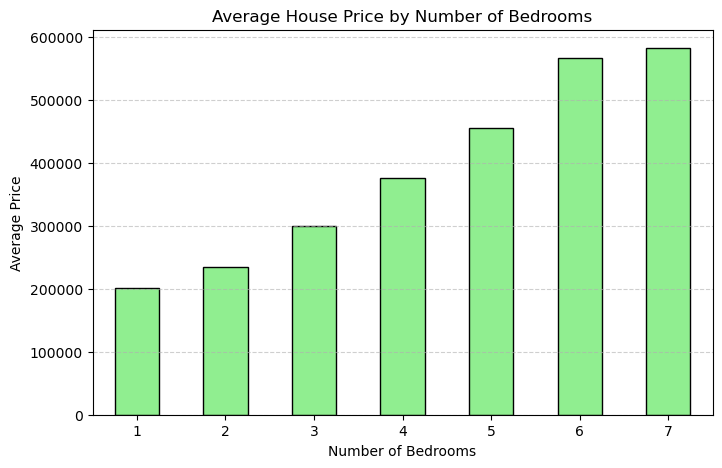

In [10]:


# Calculate average price by bedrooms
avg_price_bedrooms = df.groupby("NumBedrooms")["Price"].mean()
print("4. Avg Price by Bedrooms:\n", avg_price_bedrooms)

# Plot
plt.figure(figsize=(8,5))
avg_price_bedrooms.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Average House Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [11]:
# 5. Correlation between BackyardSpace and Price
corr_backyard_price = df["BackyardSpace"].corr(df["Price"])
print("5. Correlation (Backyard vs Price):", corr_backyard_price)


5. Correlation (Backyard vs Price): 0.0707848142271648


5. Correlation (Backyard vs Price): 0.0707848142271648


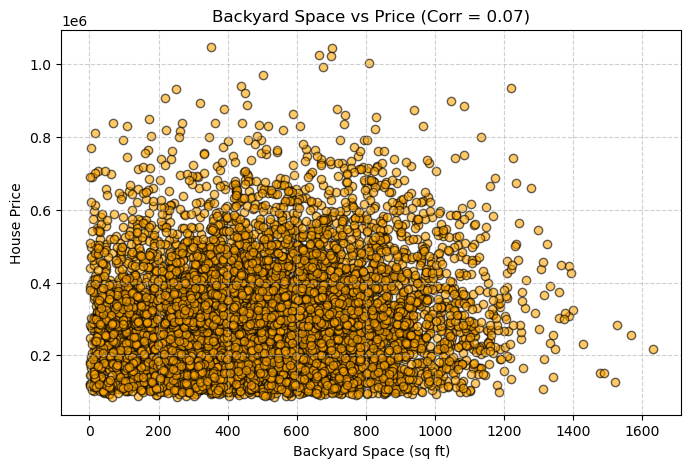

In [12]:
import matplotlib.pyplot as plt

# Calculate correlation
corr_backyard_price = df["BackyardSpace"].corr(df["Price"])
print("5. Correlation (Backyard vs Price):", corr_backyard_price)

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df["BackyardSpace"], df["Price"], alpha=0.6, color="orange", edgecolors="k")
plt.title(f"Backyard Space vs Price (Corr = {corr_backyard_price:.2f})")
plt.xlabel("Backyard Space (sq ft)")
plt.ylabel("House Price")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [13]:
# 6. Correlation between DistanceToCityCenter and Price
corr_distance_price = df["DistanceToCityCenter"].corr(df["Price"])
print("6. Correlation (Distance to City vs Price):", corr_distance_price)


6. Correlation (Distance to City vs Price): -0.2107219144391971


6. Correlation (Distance to City vs Price): -0.2107219144391971


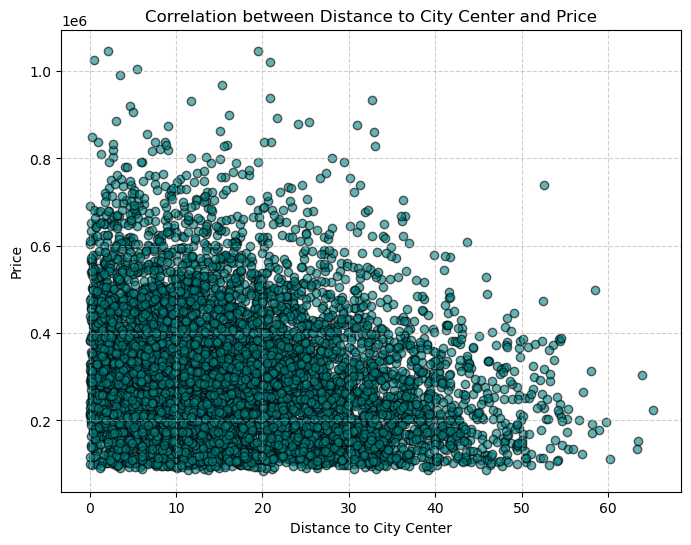

In [14]:
import matplotlib.pyplot as plt

# Calculate correlation
corr_distance_price = df["DistanceToCityCenter"].corr(df["Price"])
print("6. Correlation (Distance to City vs Price):", corr_distance_price)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df["DistanceToCityCenter"], df["Price"], alpha=0.6, color="teal", edgecolors="k")
plt.title("Correlation between Distance to City Center and Price")
plt.xlabel("Distance to City Center")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [15]:
# 7. Average price by Fireplace
avg_price_fireplace = df.groupby("Fireplace")["Price"].mean()
print("7. Avg Price by Fireplace:\n", avg_price_fireplace)


7. Avg Price by Fireplace:
 Fireplace
No     310141.677729
Yes    299190.945211
Name: Price, dtype: float64


7. Avg Price by Fireplace:
 Fireplace
No     310141.677729
Yes    299190.945211
Name: Price, dtype: float64


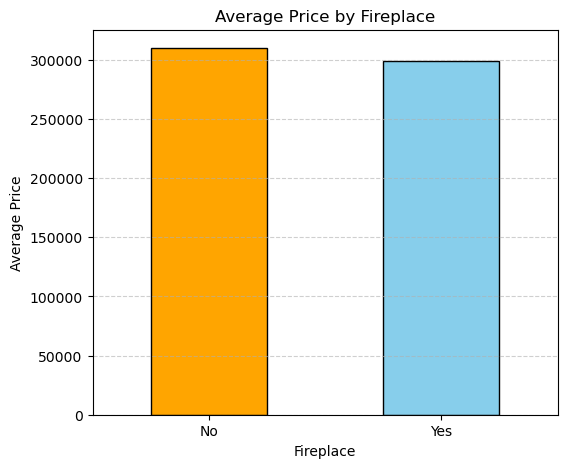

In [16]:
import matplotlib.pyplot as plt

# Calculate average price by Fireplace
avg_price_fireplace = df.groupby("Fireplace")["Price"].mean()
print("7. Avg Price by Fireplace:\n", avg_price_fireplace)

# Bar plot
avg_price_fireplace.plot(kind="bar", color=["orange", "skyblue"], edgecolor="black", figsize=(6,5))
plt.title("Average Price by Fireplace")
plt.xlabel("Fireplace")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [17]:
# 8. Average price by Garage
avg_price_garage = df.groupby("Garage")["Price"].mean()
print("8. Avg Price by Garage:\n", avg_price_garage)


8. Avg Price by Garage:
 Garage
No     308455.588186
Yes    305185.161338
Name: Price, dtype: float64


8. Avg Price by Garage:
 Garage
No     308455.588186
Yes    305185.161338
Name: Price, dtype: float64


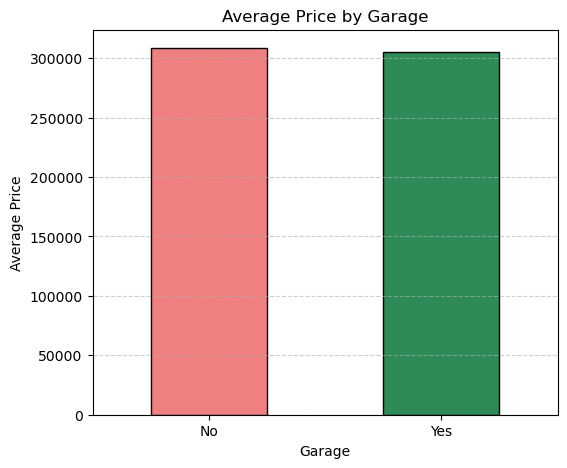

In [18]:
import matplotlib.pyplot as plt

# Calculate average price by Garage
avg_price_garage = df.groupby("Garage")["Price"].mean()
print("8. Avg Price by Garage:\n", avg_price_garage)

# Bar plot
avg_price_garage.plot(kind="bar", color=["lightcoral", "seagreen"], edgecolor="black", figsize=(6,5))
plt.title("Average Price by Garage")
plt.xlabel("Garage")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [19]:
# 9. Average price by HouseColor
avg_price_color = df.groupby("HouseColor")["Price"].mean()
print("9. Avg Price by HouseColor:\n", avg_price_color)


9. Avg Price by HouseColor:
 HouseColor
Blue      309371.219179
Green     308723.073790
Red       311299.545825
White     298972.853548
Yellow    308461.206127
Name: Price, dtype: float64


9. Avg Price by HouseColor:
 HouseColor
Blue      309371.219179
Green     308723.073790
Red       311299.545825
White     298972.853548
Yellow    308461.206127
Name: Price, dtype: float64


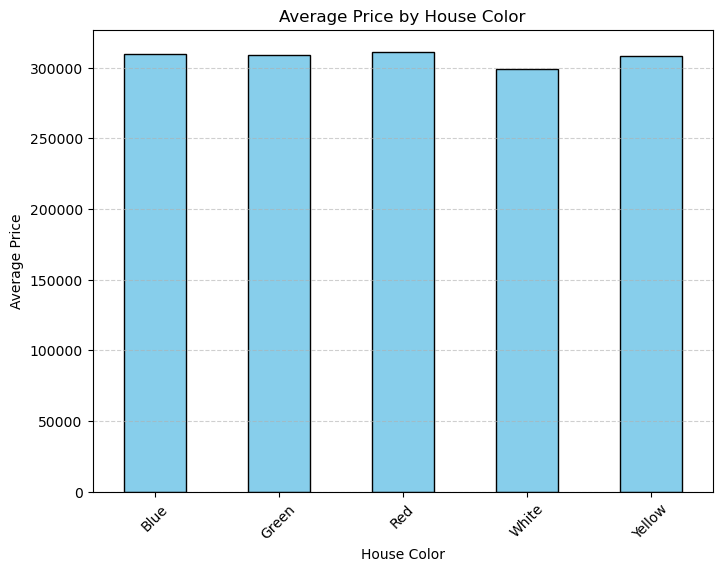

In [20]:
import matplotlib.pyplot as plt

# Calculate average price by HouseColor
avg_price_color = df.groupby("HouseColor")["Price"].mean()
print("9. Avg Price by HouseColor:\n", avg_price_color)

# Bar plot
plt.figure(figsize=(8,6))
avg_price_color.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Price by House Color")
plt.xlabel("House Color")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [21]:
# 10. Correlation of key factors with Price
corr_factors = df[["SquareFootage","NumBathrooms","NumBedrooms",
                   "DistanceToCityCenter","AgeOfHome","Price"]].corr()["Price"]
print("10. Correlation with Price:\n", corr_factors)


10. Correlation with Price:
 SquareFootage           0.546673
NumBathrooms            0.458762
NumBedrooms             0.458337
DistanceToCityCenter   -0.210722
AgeOfHome              -0.134500
Price                   1.000000
Name: Price, dtype: float64


10. Correlation with Price:
 SquareFootage           0.546673
NumBathrooms            0.458762
NumBedrooms             0.458337
DistanceToCityCenter   -0.210722
AgeOfHome              -0.134500
Price                   1.000000
Name: Price, dtype: float64


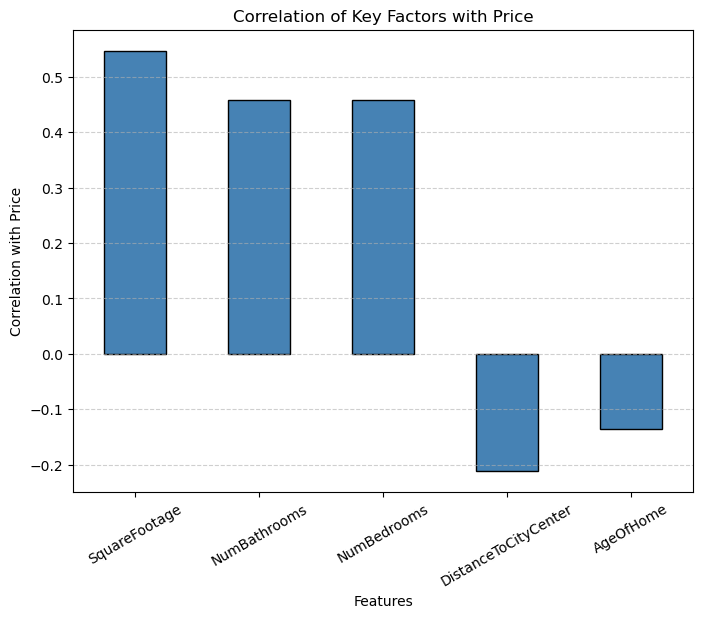

In [22]:
import matplotlib.pyplot as plt

# Calculate correlation of key factors with Price
corr_factors = df[["SquareFootage","NumBathrooms","NumBedrooms",
                   "DistanceToCityCenter","AgeOfHome","Price"]].corr()["Price"]
print("10. Correlation with Price:\n", corr_factors)

# Plot bar chart (excluding Price itself)
corr_factors.drop("Price").plot(kind="bar", color="steelblue", edgecolor="black", figsize=(8,6))
plt.title("Correlation of Key Factors with Price")
plt.xlabel("Features")
plt.ylabel("Correlation with Price")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [34]:
# Select relevant features
feature_columns = ['SquareFootage' , 'NumBathrooms', 'BackyardSpace',  'NumBedrooms', 'CrimeRate', 'DistanceToCityCenter', 'SchoolRating' , 'AgeOfHome', 'EmploymentRate', 'PropertyTaxRate', 'LocalAmenities','TransportAccess',  'RenovationQuality', 'Price']
X = df[feature_columns].copy()
y = df['IsLuxury'].copy()


In [35]:
print(f" Data Preparation:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Feature names: {list(X.columns)}")

print(f"\n Target Distribution:")
print(f"No (0): {sum(y == 0)} samples ({sum(y == 0)/len(y)*100:.1f}%)")
print(f"Yes (1): {sum(y == 1)} samples ({sum(y == 1)/len(y)*100:.1f}%)")

print("\n Data ready for machine learning!")

 Data Preparation:
Features (X): (7000, 14)
Target (y): (7000,)
Feature names: ['SquareFootage', 'NumBathrooms', 'BackyardSpace', 'NumBedrooms', 'CrimeRate', 'DistanceToCityCenter', 'SchoolRating', 'AgeOfHome', 'EmploymentRate', 'PropertyTaxRate', 'LocalAmenities', 'TransportAccess', 'RenovationQuality', 'Price']

 Target Distribution:
No (0): 3472 samples (49.6%)
Yes (1): 3528 samples (50.4%)

 Data ready for machine learning!


In [29]:
print(f" Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

 Dataset Information:
Shape: (7000, 22)
Columns: ['ID', 'Price', 'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'BackyardSpace', 'CrimeRate', 'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter', 'EmploymentRate', 'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities', 'TransportAccess', 'Fireplace', 'HouseColor', 'Garage', 'Floors', 'Windows', 'PreviousSalePrice', 'IsLuxury']


In [36]:
# Split Data and Scale Features
print(" SPLITTING DATA AND SCALING FEATURES")
print("=" * 45)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f" Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Data split and scaled!")


 SPLITTING DATA AND SCALING FEATURES
 Data Split:
Training set: 5600 samples
Test set: 1400 samples

 Data split and scaled!


In [38]:
# Train Logistic Regression Model
print(" TRAINING LOGISTIC REGRESSION MODEL")

# Train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Calculate performance metrics
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
lr_test_precision = precision_score(y_test, lr_test_pred)
lr_test_recall = recall_score(y_test, lr_test_pred)
lr_test_f1 = f1_score(y_test, lr_test_pred)

print(f" Logistic Regression Results:")
print(f"   Train Accuracy: {lr_train_acc:.4f}")
print(f"   Test Accuracy: {lr_test_acc:.4f}")
print(f"   Test Precision: {lr_test_precision:.4f}")
print(f"   Test Recall: {lr_test_recall:.4f}")
print(f"   Test F1-Score: {lr_test_f1:.4f}")

print("\n What this means:")
print(f"- Accuracy of {lr_test_acc:.3f} means {lr_test_acc*100:.1f}% correct predictions")
print(f"- Precision of {lr_test_precision:.3f} means {lr_test_precision*100:.1f}% of IsLuxury predictions are correct")
print(f"- Recall of {lr_test_recall:.3f} means {lr_test_recall*100:.1f}% of actual IsLuxury are caught")
print(f"- F1-Score of {lr_test_f1:.3f} balances precision and recall")


 TRAINING LOGISTIC REGRESSION MODEL
 Logistic Regression Results:
   Train Accuracy: 0.8843
   Test Accuracy: 0.8729
   Test Precision: 0.8871
   Test Recall: 0.8569
   Test F1-Score: 0.8718

 What this means:
- Accuracy of 0.873 means 87.3% correct predictions
- Precision of 0.887 means 88.7% of IsLuxury predictions are correct
- Recall of 0.857 means 85.7% of actual IsLuxury are caught
- F1-Score of 0.872 balances precision and recall


In [40]:
# Model 2: Decision Tree
print(" Training Decision Tree...")
print("Decision Trees are easy to understand and interpret.")

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Calculate performance metrics
dt_train_acc = accuracy_score(y_train, dt_train_pred)
dt_test_acc = accuracy_score(y_test, dt_test_pred)
dt_test_precision = precision_score(y_test, dt_test_pred)
dt_test_recall = recall_score(y_test, dt_test_pred)
dt_test_f1 = f1_score(y_test, dt_test_pred)

print(f"\n Decision Tree Results:")
print(f"   Train Accuracy: {dt_train_acc:.4f}")
print(f"   Test Accuracy: {dt_test_acc:.4f}")
print(f"   Test Precision: {dt_test_precision:.4f}")
print(f"   Test Recall: {dt_test_recall:.4f}")
print(f"   Test F1-Score: {dt_test_f1:.4f}")




 Training Decision Tree...
Decision Trees are easy to understand and interpret.

 Decision Tree Results:
   Train Accuracy: 1.0000
   Test Accuracy: 0.7971
   Test Precision: 0.7972
   Test Recall: 0.8017
   Test F1-Score: 0.7994


In [ ]:
Interpretation of the Decision Tree Results

1. Train Accuracy: 1.0000 (100%)

This means the model predicted perfectly on the training data — every example was classified correctly.

While that sounds great, it usually signals overfitting, meaning the tree has learned the training examples too specifically and might not generalize well to unseen data.

2. Test Accuracy: 0.7971 (≈79.7%)

This measures how well the model performs on new, unseen data.

A 79.7% accuracy shows good but not perfect performance.

The large gap between training (100%) and test (79.7%) confirms that the model likely overfitted to the training data.

3. Test Precision: 0.7972 (≈79.7%)

Precision tells you, “Of all the items predicted as positive (e.g., expensive houses, spam emails, etc.), how many were actually positive?”

A precision of 79.7% means about 8 out of 10 positive predictions were correct.

High precision means the model makes few false positives.

4. Test Recall: 0.8017 (≈80.2%)

Recall measures “Of all the true positives, how many did the model correctly identify?”

With 80.2% recall, your model correctly catches about 8 out of 10 actual positive cases.

High recall means the model misses few real positives.

5. Test F1-Score: 0.7994 (≈79.9%)

The F1-score combines precision and recall into one balanced metric.

An F1 of 0.7994 shows consistent and balanced performance between detecting positives and avoiding false alarms.


In [41]:
# Model 3: Random Forest
print(" Training Random Forest...")
print("Random Forest combines multiple decision trees for better performance.")

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Calculate performance metrics
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_test_precision = precision_score(y_test, rf_test_pred)
rf_test_recall = recall_score(y_test, rf_test_pred)
rf_test_f1 = f1_score(y_test, rf_test_pred)

print(f"\n Random Forest Results:")
print(f"   Train Accuracy: {rf_train_acc:.4f}")
print(f"   Test Accuracy: {rf_test_acc:.4f}")
print(f"   Test Precision: {rf_test_precision:.4f}")
print(f"   Test Recall: {rf_test_recall:.4f}")
print(f"   Test F1-Score: {rf_test_f1:.4f}")


 Training Random Forest...
Random Forest combines multiple decision trees for better performance.

 Random Forest Results:
   Train Accuracy: 1.0000
   Test Accuracy: 0.8921
   Test Precision: 0.8947
   Test Recall: 0.8909
   Test F1-Score: 0.8928


In [ ]:
1. Train Accuracy: 1.0000 (100%)

The model performs perfectly on the training data.

This is common in Random Forests because they are strong learners and can fit the training set very well.

However, it can also suggest slight overfitting if test accuracy is much lower — but in this case, the drop isn’t too large, so it’s acceptable.

2. Test Accuracy: 0.8921 (≈89.2%)

The model correctly predicts about 9 out of 10 samples on unseen data.

This is a significant improvement over the Decision Tree’s 79.7% test accuracy, showing that combining multiple trees leads to better generalization.

3. Test Precision: 0.8947 (≈89.5%)

Precision measures “Of all predictions labeled as positive, how many were actually positive?”

With 89.5% precision, the model makes few false positive errors — when it predicts something as positive, it’s usually right.

4. Test Recall: 0.8909 (≈89.1%)

Recall measures “Of all actual positives, how many did the model correctly identify?”

The model detects almost 9 out of 10 true positives, meaning it doesn’t miss many relevant cases.

5. Test F1-Score: 0.8928 (≈89.3%)

The F1-score balances precision and recall into one metric.

With an F1 around 0.89, the Random Forest demonstrates strong, balanced performance — it’s both accurate and consistent.

In [42]:
# Model Comparison
print(" MODEL COMPARISON RESULTS")

# Create comparison table
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Train_Accuracy': [lr_train_acc, dt_train_acc, rf_train_acc],
    'Test_Accuracy': [lr_test_acc, dt_test_acc, rf_test_acc],
    'Test_Precision': [lr_test_precision, dt_test_precision, rf_test_precision],
    'Test_Recall': [lr_test_recall, dt_test_recall, rf_test_recall],
    'Test_F1': [lr_test_f1, dt_test_f1, rf_test_f1],
    'Overfitting': [abs(lr_train_acc - lr_test_acc), abs(dt_train_acc - dt_test_acc),
                   abs(rf_train_acc - rf_test_acc)]
})

# Sort by Test Accuracy (best performance)
results = results.sort_values('Test_Accuracy', ascending=False)

print(results.round(4))
print()

# Find best model
best_model = results.iloc[0]
print(f" BEST MODEL: {best_model['Model']}")
print(f"   Test Accuracy: {best_model['Test_Accuracy']:.4f}")
print(f"   Test F1-Score: {best_model['Test_F1']:.4f}")
print(f"   Overfitting: {best_model['Overfitting']:.4f}")

print("\n Business Recommendation:")
print(f"Use {best_model['Model']} for IsLuxury prediction.")
print(f"This model achieves {best_model['Test_Accuracy']*100:.1f}% accuracy.")
print(f"F1-Score of {best_model['Test_F1']:.3f} indicates good balance of precision and recall.")


 MODEL COMPARISON RESULTS
                 Model  Train_Accuracy  Test_Accuracy  Test_Precision  \
2        Random Forest          1.0000         0.8921          0.8947   
0  Logistic Regression          0.8843         0.8729          0.8871   
1        Decision Tree          1.0000         0.7971          0.7972   

   Test_Recall  Test_F1  Overfitting  
2       0.8909   0.8928       0.1079  
0       0.8569   0.8718       0.0114  
1       0.8017   0.7994       0.2029  

 BEST MODEL: Random Forest
   Test Accuracy: 0.8921
   Test F1-Score: 0.8928
   Overfitting: 0.1079

 Business Recommendation:
Use Random Forest for IsLuxury prediction.
This model achieves 89.2% accuracy.
F1-Score of 0.893 indicates good balance of precision and recall.


In [44]:
import joblib

In [45]:


# Save the model to a file
joblib.dump((rf_model, X.columns), 'luxury_model.pkl')


print("Model saved successfully as luxury_model.pkl")


Model saved successfully as luxury_model.pkl


In [52]:
model, feature_names = joblib.load('luxury_model.pkl')


In [53]:
import streamlit as st


In [57]:

import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Load the saved Random Forest model
model, feature_names = joblib.load('luxury_model.pkl')

st.title("🏡 Luxury Property Prediction App")
st.write("Enter the property details below to check if it’s likely a **Luxury Property** or not.")

# Input fields
price = st.number_input("Price", min_value=0.0)
num_bathrooms = st.number_input("Number of Bathrooms", min_value=0)
num_bedrooms = st.number_input("Number of Bedrooms", min_value=0)
crime_rate = st.number_input("Crime Rate", min_value=0.0)
school_rating = st.slider("School Rating (1–10)", 1, 10, 5)
distance_to_city = st.number_input("Distance to City Center (km)", min_value=0.0)


# Create input array for prediction
features = np.array([[price, num_bathrooms, num_bedrooms, 
                      crime_rate, school_rating, distance_to_city,]])

# Predict
if st.button("Predict Luxury Status"):
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][1]

    if prediction == 1:
        st.success(f"💎 This property is **Luxury** (Confidence: {probability:.2%})")
    else:
        st.warning(f"🏠 This property is **Not Luxury** (Confidence: {probability:.2%})")


2025-11-13 10:57:22.893 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 10:57:22.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 10:57:22.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 10:57:22.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 10:57:22.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 10:57:22.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 10:57:22.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-13 10:57:22.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [58]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)

In [61]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'fastapi'